# Importing all the Necessary Libraries 

In [98]:
import numpy as np 
import pandas as pd

# Reading the Data Set

In [99]:
Data = pd.read_csv('Admission_Predict.csv')
Data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [100]:
Data.shape

(400, 9)

In [101]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Checking Duplicated values

In [102]:
Data.duplicated().any()

False

In [103]:
Data.duplicated().sum()

0

# Dropping the columns

In [104]:
Data.drop('Serial No.',axis=1,inplace=True)

In [105]:
Data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Splitting the Data set

In [106]:
X = Data.iloc[:,:-1]
y= Data.iloc[:,-1]

In [107]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [108]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# Splitting the data set into Traing and Testimng data set

In [109]:
from sklearn.model_selection import train_test_split 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [111]:
X_train.shape

(320, 7)

In [112]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


# Feature Scaling

In [113]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()

In [114]:
X_train = MMS.fit_transform(X_train)
X_test = MMS.transform(X_test)

In [115]:
X_train

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

# Building Artificial Neural Network

In [116]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

In [117]:
model = Sequential()


model.add(Dense(7,activation='relu' ,input_dim =7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1, activation='linear')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [119]:
History = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 43ms/step - loss: 0.3002 - val_loss: 0.2827
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2391 - val_loss: 0.2198
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1816 - val_loss: 0.1618
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1651

8/8 [==============================] - 0s 9ms/step - loss: 0.1303 - val_loss: 0.1105
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0879 - val_loss: 0.0688
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0553 - val_loss: 0.0414
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0353 - val_loss: 0.0265
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0251 - val_loss: 0.0207
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0209 - val_loss: 0.0195
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 11/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0194 - val_loss: 0.0188
Epoch 12/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 13/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0180 - val_loss: 0.0171
Epoch 14/100
8/8 [===============

In [120]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [121]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7621012669685567

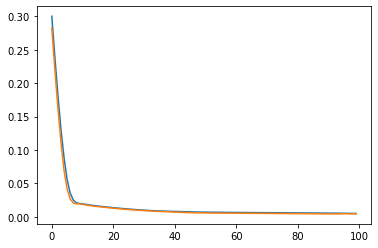

In [123]:
import matplotlib.pyplot as plt 
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])